# 17장. 서포트 벡터 머신

이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/machine-learning-with-python-cookbook/blob/master/17.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/machine-learning-with-python-cookbook/blob/master/17.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 17.1 선형 분류기 훈련하기

In [1]:
# 라이브러리를 임포트합니다.
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터를 로드하고 두 개의 클래스와 두 개의 특성만 선택합니다.
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

# 특성을 표준화합니다.
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 서포트 벡터 분류기를 만듭니다.
svc = LinearSVC(C=1.0)

# 모델을 훈련합니다.
model = svc.fit(features_standardized, target)

In [2]:
# 라이브러리를 임포트합니다.
from matplotlib import pyplot as plt

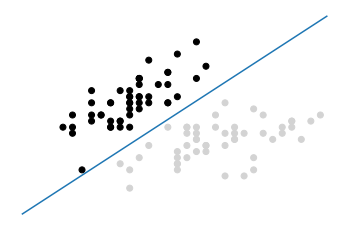

In [3]:
# 클래스를 색으로 구분한 산점도를 그립니다.
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# 초평면을 만듭니다.
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# 초평면을 그립니다.
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [4]:
# 새로운 샘플을 만듭니다.
new_observation = [[ -2,  3]]

# 새로운 샘플의 클래스를 예측합니다.
svc.predict(new_observation)

array([0])

### 붙임

In [5]:
svc.decision_function(new_observation)

array([-6.84224141])

## 17.2 커널을 사용해 선형적으로 구분되지 않는 클래스 다루기

In [6]:
# 라이브러리를 임포트합니다.
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 랜덤 시드를 지정합니다.
np.random.seed(0)

# 두 개의 특성을 만듭니다.
features = np.random.randn(200, 2)

# XOR 연산(이것이 무엇인지 알 필요는 없습니다)을 사용하여
# 선형적으로 구분할 수 없는 클래스를 만듭니다.
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# 방사 기저 함수 커널을 사용한 서포트 벡터 머신을 만듭니다.
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# 분류기를 훈련합니다.
model = svc.fit(features, target)

In [7]:
# 샘플과 결정 경계를 그립니다.
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap.colors[idx],
                    marker="+", label=cl)

In [8]:
# 선형 커널을 사용한 서포트 벡터 분류기를 만듭니다. with a linear kernel
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# 모델을 훈련합니다.
svc_linear.fit(features, target)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

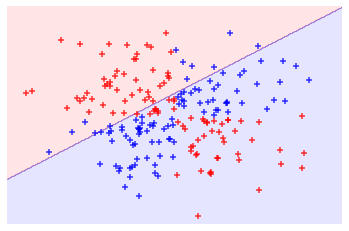

In [9]:
# 샘플과 초평면을 그립니다.
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show();

In [10]:
# 방사 기저 함수 커널을 사용한 서포트 벡터 머신을 만듭니다.
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# 분류기를 훈련합니다.
model = svc.fit(features, target)

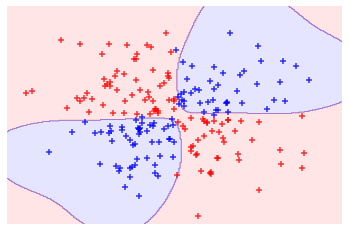

In [11]:
# 샘플과 초평면을 그립니다.
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"), plt.show();

## 17.3 예측 확률 계산하기

In [12]:
# 라이브러리를 임포트합니다.
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 특성을 표준화합니다.
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 서포트 벡터 분류기를 만듭니다. object
svc = SVC(kernel="linear", probability=True, random_state=0)

# 분류기를 훈련합니다.
model = svc.fit(features_standardized, target)

# 새로운 샘플을 만듭니다.
new_observation = [[.4, .4, .4, .4]]

# 예측 확률을 확인합니다.
model.predict_proba(new_observation)

array([[0.00593111, 0.96898012, 0.02508877]])

## 17.4 서포트 벡터 식별하기

In [13]:
# 라이브러리를 임포트합니다.
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

#데이터를 로드하고 두 개의 클래스만 선택합니다.
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# 특성을 표준화합니다.
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 서포트 벡터 분류기를 만듭니다. object
svc = SVC(kernel="linear", random_state=0)

# 분류기를 훈련합니다.
model = svc.fit(features_standardized, target)

# 서포트 벡터를 확인합니다.
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [14]:
model.support_

array([23, 41, 57, 98], dtype=int32)

In [15]:
model.n_support_

array([2, 2], dtype=int32)

## 17.5 불균형한 클래스 다루기

In [16]:
# 라이브러리를 임포트합니다.
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

#데이터를 로드하고 두 개의 클래스만 선택합니다.
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# 처음 40개 샘플을 제거하여 불균형한 클래스를 만듭니다.
features = features[40:,:]
target = target[40:]

# 타깃 벡터에서 0이 아닌 클래스는 모두 1로 만듭니다.
target = np.where((target == 0), 0, 1)

# 특성을 표준화합니다.
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 서포트 벡터 분류기를 만듭니다.
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)

# 분류기를 훈련합니다.
model = svc.fit(features_standardized, target)